## Implementation 
- This notebook explains how using logistic regression to make prediction for outcomes
- Data we are using here is from UCI ML repository. It is related to marjetting campains based on phone calls of a banking institution
- Goal here to predict whether the client will subscribe to a term deposit or not 


### About Data 

### Input variables
- 1.age (numeric)
- 2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- 3.marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- 4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- 5.default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- 6.housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- 7.loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- 8.contact: contact communication type (categorical: “cellular”, “telephone”)
- 9.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- 10.day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- 11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- 12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14.previous: number of contacts performed before this campaign and for this client (numeric)
- 15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- 16.emp.var.rate: employment variation rate — (numeric)
- 17.cons.price.idx: consumer price index — (numeric)
- 18.cons.conf.idx: consumer confidence index — (numeric)
- 19.euribor3m: euribor 3 month rate — (numeric)
- 20.nr.employed: number of employees — (numeric)

#### Predict variable (desired target):

- y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)


### Importing required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
plt.rc("font",size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [3]:
bank_calls=pd.ExcelFile(r"C:\Users\suyashi144893\Documents\data Sets\BankCalls.xlsx").parse("Calls")

In [4]:
bank_calls.shape

(41188, 21)

In [5]:
bank_calls.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Prediction variable is "y" 1- yes, 0- no
- Our data contains few varaibles which so many categories. for example education. For better modelling we need to reduce this categories 



In [5]:
bank_calls['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
# grouping "basic.4y,basic.9y and basic.9y" together as "Basic"
bank_calls['education']=np.where(bank_calls['education']=='basic.9y',"Basic",bank_calls['education'])
bank_calls['education']=np.where(bank_calls['education']=='basic.4y',"Basic",bank_calls['education'])
bank_calls['education']=np.where(bank_calls['education']=='basic.6y',"Basic",bank_calls['education'])

## Understanding Data relationship for feature selection using Data Exploration

In [7]:
bank_calls["y"].value_counts() 

0    36548
1     4640
Name: y, dtype: int64

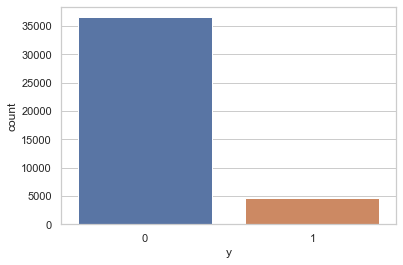

In [8]:
sns.countplot(x="y",data=bank_calls)
plt.show()


## Our data outcome is imbalanced as number of no-subscription is high as compared to subscription

In [9]:
print("per_nosubscription=",36548/41188*100)


per_nosubscription= 88.73458288821988


In [10]:
print("per_subscription=",4640/41188*100)

per_subscription= 11.265417111780131


In [11]:
## We have to balance our data but before that lets do more exploration
bank_calls.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Insights from above: 
- Average age of coustmers who bought term deposit is higher than that of the coustmers who didn't 
- Campaigns(Calls) are lower for coutomers who bought term deposit

In [12]:
bank_calls.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [13]:
bank_calls.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [14]:
bank_calls.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Text(0, 0.5, 'Frequency of purchase')

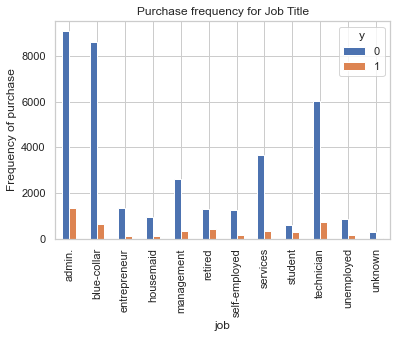

In [15]:
%matplotlib inline 
pd.crosstab(bank_calls.job,bank_calls.y).plot(kind="bar")
plt.title("Purchase frequency for Job Title")
plt.xlabel("job")
plt.ylabel("Frequency of purchase")

### Insights: 
- The frequency of purchase of the deposit depends a great deal on the job title.Thus,the job can be a good predictor of the outcome varaible

Text(0, 0.5, 'Proportion of Coustomers')

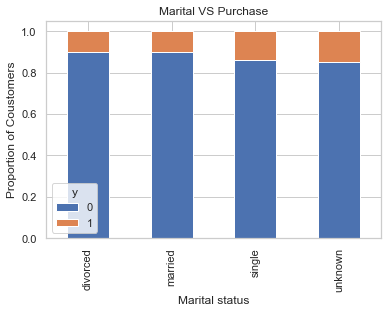

In [16]:
t=pd.crosstab(bank_calls.marital,bank_calls.y)
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Marital VS Purchase")
plt.xlabel("Marital status")
plt.ylabel("Proportion of Coustomers")

## Insights:
The marital status does not seem a strong predictor for outcome varaible

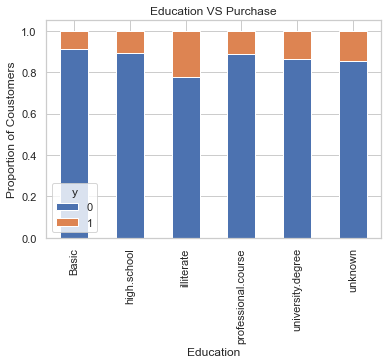

In [17]:
t=pd.crosstab(bank_calls.education,bank_calls.y)
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Education VS Purchase")
plt.xlabel("Education")
plt.ylabel("Proportion of Coustomers")
plt.savefig("education_purchase")

### Insights
- Education seems a good predictor of the outcome variable

Text(0, 0.5, 'Purchase frequency')

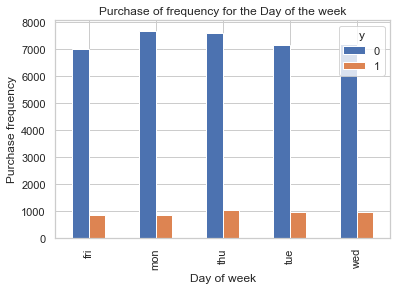

In [18]:
pd.crosstab(bank_calls.day_of_week,bank_calls.y).plot(kind="bar")
plt.title("Purchase of frequency for the Day of the week")
plt.xlabel("Day of week")
plt.ylabel("Purchase frequency")

- Day of week is not a good predictor 

Text(0, 0.5, 'Purchase frequency')

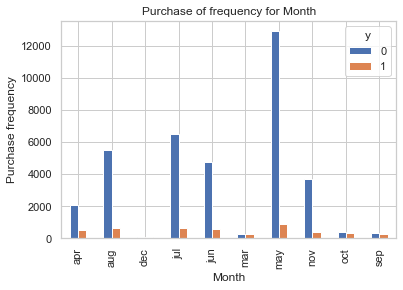

In [19]:
pd.crosstab(bank_calls.month,bank_calls.y).plot(kind="bar")
plt.title("Purchase of frequency for Month")
plt.xlabel("Month")
plt.ylabel("Purchase frequency")

Text(0, 0.5, 'frequency')

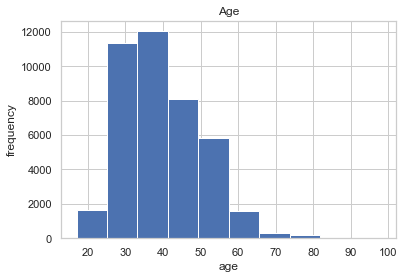

In [20]:
bank_calls.age.hist(stacked=True)
plt.title("Age")
plt.xlabel("age")
plt.ylabel("frequency")

<AxesSubplot:ylabel='Frequency'>

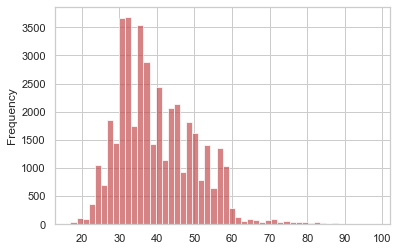

In [21]:
bank_calls["age"].plot.hist(color='r', alpha=0.7, bins=50)

C:\Users\suyashi144893\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='y'>

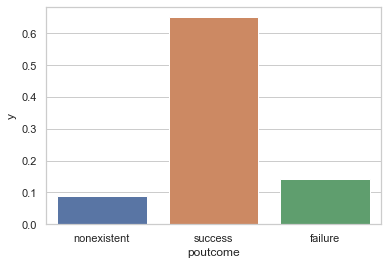

In [22]:
sns.barplot("poutcome","y", data=bank_calls,ci=False)

Text(0, 0.5, 'Purchase frequency')

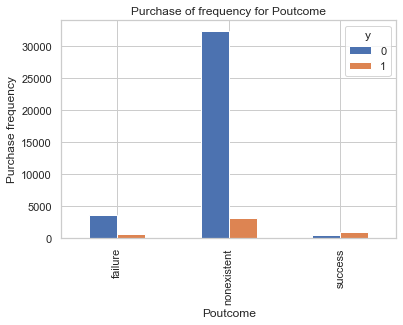

In [23]:
pd.crosstab(bank_calls.poutcome,bank_calls.y).plot(kind="bar")
plt.title("Purchase of frequency for Poutcome")
plt.xlabel("Poutcome")
plt.ylabel("Purchase frequency")

- Poutcome seems to be a good predictor of the outcome variable

Train accuracy: 0.91
Test accuracy: 0.9

Test confusion_matrix


Text(30.5, 0.5, 'True')

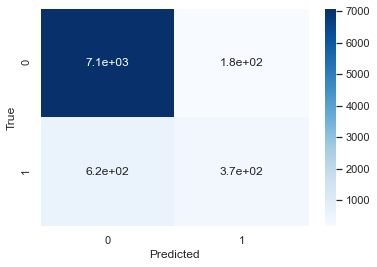

In [12]:
# Define Feature matrix ad Target vector
X = new_d.drop('y', axis=1)
y = new_d.y

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## Dimensionality reduction 
technique can be defined as, "It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information." These techniques are widely used in machine learning for obtaining a better fit predictive model while solving the classification and regression problems.
- **Multicollinearity** occurs when features (input variables) are highly correlated with one or more of the other features in the dataset. It affects the performance of regression and classification models. PCA (Principal Component Analysis) takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variable.
- **PCA** 
PCA is a linear dimensionality reduction technique (algorithm) that transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.
      -    If the variables are not measured on a similar scale, we need to do feature scaling before applying PCA for our data. This is because PCA directions are highly sensitive to the scale of the data. 
      - The most important part in PCA is selecting the best number of components for the given dataset